# Project 2: Ames, IA Housing Data - Sale Price Prediction Models

## Problem Statement

The housing market plays an important role in the US economy. Being able to accurately identify factors affecting housing prices and predict prices of housing prices based on a given set of attributes is important for many stakeholders for their financial considerations.

Using our model, we aim to answer the following problems:
* Which features of a property are important in predicting sale prices of houses in Ames, IA, and which contribute to higher prices or lower prices?

* What is the predicted sale price of a house in Ames, IA based on its features?

* What can homeowners in Ames do to improve the saleprice of their homes?

* What features should home buyers focus on or disregard, considering their budget?

## Executive Summary

In this project, we examine a housing dataset consisting of various attributes and features, along with its sale prices during 2006 to 2010 in Ames, IA. 

We aim to understand which features of a property greatly affect sale prices of houses in Ames, IA using various regression models. After evaluating the performance our models, we optimize a model with best performance to accurately predict housing sale prices when given a set of features. 

The model will be useful for many stakeholders including real estate agents, investors, house owners, and house buyers in a decision-making process by having a benchmark / certainty in prices. It helps them make a more informed decision when calculating the market value of their houses.

### Contents

1. Data Import & Cleaning 
    * Libraries
    * Import Train and Test Data
    * Rename Columns
    * Check Null Values
    * Update Column Data Types
    * Check Outliers


2. Exploratory Data Analysis
    * Histograms: Numerical Columns Distribution
    * Scatter Plots: Numerical Columns vs Sale Price
    * Bar Charts: Categorical Columns Distribution
    * Box Plots: Categorical Columns vs Sale Price
  
  
3. Pre-processing
    * Encode / Map: Categorical data
    * Encode / Map: Ordinal Columns
    * Dummies: Categorical columns
    * Features matrix (`X`) and target vector (`y`)
    * Train/Test Split Training Data
    * Scaling


4. Modelling
    * Candidate Models and Hyperparameters 
        * Linear Regression
        * Ridge
        * Lasso
        * ElasticNet
    * Evaluate Models on Test Data
        * Linear Regression
        * Ridge
        * Lasso
        * ElasticNet


5. Features Selection
    * Selected Features
    * Final Model with Selected Features
    
    
6. Kaggle Submission


7. Conclusions and Recommendations

## 1. Data Import & Cleaning

### Libraries

In [1]:
#import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline


%matplotlib inline

#display more rows and columns
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)



Bad key "text.kerning_factor" on line 4 in
/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution



### Import Train and Test Data

In [2]:
#load train data
ames = pd.read_csv('./datasets/train.csv', keep_default_na=False)

#load test data
ames_test = pd.read_csv('./datasets/test.csv', keep_default_na=False)

In [3]:
#check ames head
ames.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289,Gd,TA,CBlock,TA,TA,No,GLQ,533,Unf,0,192,725,GasA,Ex,Y,SBrkr,725,754,0,1479,0,0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976,RFn,2,475,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132,Gd,TA,PConc,Gd,TA,No,GLQ,637,Unf,0,276,913,GasA,Ex,Y,SBrkr,913,1209,0,2122,1,0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997,RFn,2,559,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0,TA,Gd,CBlock,TA,TA,No,GLQ,731,Unf,0,326,1057,GasA,TA,Y,SBrkr,1057,0,0,1057,1,0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,1953,Unf,1,246,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73,9802,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,SBrkr,744,700,0,1444,0,0,2,1,3,1,TA,7,Typ,0,NA,BuiltIn,2007,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82,14235,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0,TA,TA,PConc,Fa,Gd,No,Unf,0,Unf,0,676,676,GasA,TA,Y,SBrkr,831,614,0,1445,0,0,2,0,3,1,TA,6,Typ,0,NA,Detchd,1957,Unf,2,484,TA,TA,N,0,59,0,0,0,0,NA,NA,NA,0,3,2010,WD,138500


In [4]:
#check ames_test head
ames_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NA,Detchd,1910,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NA,NA,NA,0,4,2006,WD
1,2718,905108090,90,RL,,9662,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NA,Attchd,1977,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NA,NA,NA,0,8,2006,WD
2,2414,528218130,60,RL,58,17104,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NA,NA,NA,0,9,2006,New
3,1989,902207150,30,RM,60,8520,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NA,Detchd,1935,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NA,NA,NA,0,7,2007,WD
4,625,535105100,20,RL,,9500,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NA,NA,NA,0,7,2009,WD


In [5]:
#check ames shape
ames.shape

(2051, 81)

In [6]:
#check ames_test shape
ames_test.shape

(879, 80)

In [7]:
#check ames columns
ames.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [8]:
#check ames_test columns
ames_test.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [9]:
#check ames info
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Id               2051 non-null   int64 
 1   PID              2051 non-null   int64 
 2   MS SubClass      2051 non-null   int64 
 3   MS Zoning        2051 non-null   object
 4   Lot Frontage     2051 non-null   object
 5   Lot Area         2051 non-null   int64 
 6   Street           2051 non-null   object
 7   Alley            2051 non-null   object
 8   Lot Shape        2051 non-null   object
 9   Land Contour     2051 non-null   object
 10  Utilities        2051 non-null   object
 11  Lot Config       2051 non-null   object
 12  Land Slope       2051 non-null   object
 13  Neighborhood     2051 non-null   object
 14  Condition 1      2051 non-null   object
 15  Condition 2      2051 non-null   object
 16  Bldg Type        2051 non-null   object
 17  House Style      2051 non-null   

In [10]:
#check ames_test info
ames_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Id               879 non-null    int64 
 1   PID              879 non-null    int64 
 2   MS SubClass      879 non-null    int64 
 3   MS Zoning        879 non-null    object
 4   Lot Frontage     879 non-null    object
 5   Lot Area         879 non-null    int64 
 6   Street           879 non-null    object
 7   Alley            879 non-null    object
 8   Lot Shape        879 non-null    object
 9   Land Contour     879 non-null    object
 10  Utilities        879 non-null    object
 11  Lot Config       879 non-null    object
 12  Land Slope       879 non-null    object
 13  Neighborhood     879 non-null    object
 14  Condition 1      879 non-null    object
 15  Condition 2      879 non-null    object
 16  Bldg Type        879 non-null    object
 17  House Style      879 non-null    ob

### Data Cleaning

#### Renaming Columns

In [11]:
#renaming ames columns
ames.columns = [col.lower().replace(' ','_') for col in ames.columns]

In [12]:
#renaming ames_test columns
ames_test.columns = [col.lower().replace(' ','_') for col in ames_test.columns]

#### Null Values

In [13]:
#check null values and display all
pd.set_option('display.max_rows', ames.shape[0]+1)
ames.isnull().sum()

#replace empty strings with np.nan
ames.replace('',np.nan,inplace=True)
ames_test.replace('',np.nan,inplace=True)

In [14]:
ames.isnull().sum()

id                   0
pid                  0
ms_subclass          0
ms_zoning            0
lot_frontage       330
lot_area             0
street               0
alley                0
lot_shape            0
land_contour         0
utilities            0
lot_config           0
land_slope           0
neighborhood         0
condition_1          0
condition_2          0
bldg_type            0
house_style          0
overall_qual         0
overall_cond         0
year_built           0
year_remod/add       0
roof_style           0
roof_matl            0
exterior_1st         0
exterior_2nd         0
mas_vnr_type        22
mas_vnr_area        22
exter_qual           0
exter_cond           0
foundation           0
bsmt_qual            1
bsmt_cond            1
bsmt_exposure        4
bsmtfin_type_1       1
bsmtfin_sf_1         1
bsmtfin_type_2       2
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
heating              0
heating_qc           0
central_air          0
electrical 

In [15]:
ames_test.isnull().sum()

id                   0
pid                  0
ms_subclass          0
ms_zoning            0
lot_frontage       160
lot_area             0
street               0
alley                0
lot_shape            0
land_contour         0
utilities            0
lot_config           0
land_slope           0
neighborhood         0
condition_1          0
condition_2          0
bldg_type            0
house_style          0
overall_qual         0
overall_cond         0
year_built           0
year_remod/add       0
roof_style           0
roof_matl            0
exterior_1st         0
exterior_2nd         0
mas_vnr_type         1
mas_vnr_area         1
exter_qual           0
exter_cond           0
foundation           0
bsmt_qual            0
bsmt_cond            0
bsmt_exposure        0
bsmtfin_type_1       0
bsmtfin_sf_1         0
bsmtfin_type_2       0
bsmtfin_sf_2         0
bsmt_unf_sf          0
total_bsmt_sf        0
heating              0
heating_qc           0
central_air          0
electrical 

##### Lot Frontage

In [16]:
#lot_frontage has a 330 null values, but may coincide with lot_config which contains 'FR2' or 'FR3' indicating a frontage.
ames[ames['lot_frontage'].isnull()].loc[(ames['lot_config']== 'FR2') | (ames['lot_config']=='FR3'),ames.columns[4:12]] 

,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config
106,NaN,2651,Pave,NA,Reg,Lvl,AllPub,FR2
226,NaN,4500,Pave,NA,Reg,Lvl,AllPub,FR2
335,NaN,8755,Pave,NA,IR1,Lvl,AllPub,FR2
430,NaN,5105,Pave,NA,IR2,Lvl,AllPub,FR2
454,NaN,2403,Pave,NA,IR1,Lvl,AllPub,FR2
781,NaN,17199,Pave,NA,Reg,Lvl,AllPub,FR2
926,NaN,12735,Pave,NA,IR1,Lvl,AllPub,FR2
927,NaN,11000,Pave,NA,Reg,Lvl,AllPub,FR2
1583,NaN,14311,Pave,NA,IR1,Lvl,AllPub,FR3
1866,NaN,11000,Pave,NA,Reg,Lvl,AllPub,FR2


In [17]:
#drop columns
ames.drop(ames.loc[(ames['lot_frontage'].isnull()) & ((ames['lot_config']== 'FR2') | (ames['lot_config']=='FR3'))].index,inplace=True)

In [18]:
#fill rest of the lot frontage with 0 for train and test
ames.lot_frontage.fillna(0,inplace=True)
ames_test.lot_frontage.fillna(0,inplace=True)

##### Masonry Veneer Type and Mansonry Veneer Area

In [19]:
#fix mas_vnr_type == NaN, fill mas_vnr_type and mas_vnr_area with 'None'.
ames['mas_vnr_type'].fillna('None',inplace=True)
ames['mas_vnr_area'].fillna('0',inplace=True)

ames_test['mas_vnr_type'].fillna('None',inplace=True)
ames_test['mas_vnr_area'].fillna('0',inplace=True)

In [20]:
#fix mas_vnr_type = None and mas_vnr_area that contains a value more than 0. 
ames.loc[(ames['mas_vnr_type'] == 'None') & (ames['mas_vnr_area'] != '0'),ames.columns[26:28]]

,mas_vnr_type,mas_vnr_area
765,None,1
810,None,288
1148,None,1
1684,None,1
1832,None,344


In [21]:
#In that case, mas_vnr_area should be 0
ames.loc[(ames['mas_vnr_type'] == 'None') & (ames['mas_vnr_area'] != '0'),'mas_vnr_area'] = 0

In [22]:
#test_data
ames_test.loc[ames_test['mas_vnr_type'].isnull(),['mas_vnr_type','mas_vnr_area']]

,mas_vnr_type,mas_vnr_area


##### Basement

In [23]:
#fix bsmt_exposure null which is not null in bsmt_qual and bsmt_cond 
ames.loc[(ames['bsmt_exposure'].isnull()) & (ames['bsmt_qual'].notnull()),ames.columns[0:34]]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure
1456,1797,528458090,60,FV,81,10411,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0,Gd,TA,CBlock,Gd,TA,NaN
1547,67,528445060,20,RL,73,8987,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,226,Gd,TA,PConc,Gd,TA,NaN
1997,2780,907194130,60,RL,65,14006,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144,Gd,TA,PConc,Gd,TA,NaN


In [24]:
#fill with mode
ames.loc[(ames['bsmt_exposure'].isnull()) & (ames['bsmt_qual'].notnull()),'bsmt_exposure'] = ames.loc[(ames['bsmt_qual'] == 'Gd') & (ames['bsmt_cond'] == 'TA'),'bsmt_exposure'].mode()[0]


In [25]:
#fix bsmtfin_type_2 null but has bsmtfin_sf_2 not null or 0
ames.loc[(ames['bsmtfin_type_2'].isnull()) & (ames['bsmtfin_sf_2'].notnull()),:]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1147,445,528142130,20,RL,85,10655,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296,Gd,TA,PConc,Gd,TA,No,GLQ,1124,NaN,479,1603,3206,GasA,Ex,Y,SBrkr,1629,0,0,1629,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003,RFn,3,880,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,10,2009,WD,284000


In [26]:
#fill with mode
ames.loc[(ames['bsmtfin_type_2'].isnull()) & (ames['bsmtfin_sf_2'].notnull()),'bsmtfin_type_2'] = ames.loc[(ames['bsmtfin_sf_2'] != '0')]['bsmtfin_type_2'].mode()[0]


In [27]:
#fix bsmt_full_bath and bsmt_half_bath null values. 
ames.loc[(ames['bsmt_full_bath'].isnull()) | (ames['bsmt_half_bath'].isnull()),('bsmt_qual','bsmt_full_bath','bsmt_half_bath')]

,bsmt_qual,bsmt_full_bath,bsmt_half_bath
616,NA,NaN,NaN
1327,NaN,NaN,NaN


In [28]:
#Both have no values in basement or bsmt_qual = NA, so full bath and half bath should be 0
ames['bsmt_full_bath'].fillna(0,inplace=True)
ames['bsmt_half_bath'].fillna(0,inplace=True)

In [29]:
#remove row with many null values on in basement (1342)
ames.loc[ames['bsmt_qual'].isnull(),ames.columns[31:40]]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf
1327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#drop row
ames.drop(ames.loc[(ames['bsmt_qual'].isnull())].index,inplace=True)

##### Garage

In [31]:
#fix overall garage no value row (1714)
ames.loc[(ames['garage_type'] != 'NA') & (ames['garage_yr_blt'].isnull()),ames.columns[59:66]]

,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond
1712,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#drop
ames.drop(ames.loc[(ames['garage_type'] != 'NA') & (ames['garage_yr_blt'].isnull())].index,inplace=True)

In [33]:
#change garage_yr_blt = NaN to year_built for train and test
ames['garage_yr_blt'].fillna(ames['year_built'],inplace=True)
ames_test['garage_yr_blt'].fillna(ames_test['year_built'],inplace=True)

#### Update Column Data Types

In [34]:
ames.dtypes

id                  int64
pid                 int64
ms_subclass         int64
ms_zoning          object
lot_frontage       object
lot_area            int64
street             object
alley              object
lot_shape          object
land_contour       object
utilities          object
lot_config         object
land_slope         object
neighborhood       object
condition_1        object
condition_2        object
bldg_type          object
house_style        object
overall_qual        int64
overall_cond        int64
year_built          int64
year_remod/add      int64
roof_style         object
roof_matl          object
exterior_1st       object
exterior_2nd       object
mas_vnr_type       object
mas_vnr_area       object
exter_qual         object
exter_cond         object
foundation         object
bsmt_qual          object
bsmt_cond          object
bsmt_exposure      object
bsmtfin_type_1     object
bsmtfin_sf_1       object
bsmtfin_type_2     object
bsmtfin_sf_2       object
bsmt_unf_sf 

In [35]:
ames_test.dtypes

id                  int64
pid                 int64
ms_subclass         int64
ms_zoning          object
lot_frontage       object
lot_area            int64
street             object
alley              object
lot_shape          object
land_contour       object
utilities          object
lot_config         object
land_slope         object
neighborhood       object
condition_1        object
condition_2        object
bldg_type          object
house_style        object
overall_qual        int64
overall_cond        int64
year_built          int64
year_remod/add      int64
roof_style         object
roof_matl          object
exterior_1st       object
exterior_2nd       object
mas_vnr_type       object
mas_vnr_area       object
exter_qual         object
exter_cond         object
foundation         object
bsmt_qual          object
bsmt_cond          object
bsmt_exposure      object
bsmtfin_type_1     object
bsmtfin_sf_1        int64
bsmtfin_type_2     object
bsmtfin_sf_2        int64
bsmt_unf_sf 

In [36]:
#convert these columns to numerical
to_int_col = ['lot_frontage','mas_vnr_area','bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf','bsmt_full_bath','bsmt_half_bath','garage_cars','garage_area','year_built','year_remod/add','garage_yr_blt','yr_sold']

for col in to_int_col:
    ames[col] = ames[col].astype(int)
    ames_test[col] = ames_test[col].astype(int)

In [37]:
#convert these columns to categorical
to_cat_col = ['ms_subclass']

for col in to_cat_col:
    ames[col] = ames[col].astype(str)
    ames_test[col] = ames_test[col].astype(str)

In [38]:
#categorical and numerical columns list

categorical_col = ['ms_subclass', 'ms_zoning', 'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
'lot_config', 'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type', 'house_style', 'roof_style','roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual','bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1',
'bsmtfin_type_2','heating', 'heating_qc', 'central_air', 'electrical','kitchen_qual','functional',
'fireplace_qu', 'garage_type','garage_finish', 'garage_qual', 'garage_cond', 'paved_drive',
'pool_qc','fence', 'misc_feature', 'sale_type']
        
numerical_col = ['lot_frontage', 'lot_area', 'year_built', 'year_remod/add', 'overall_qual', 'overall_cond',
       'mas_vnr_area',  'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 
        'half_bath', 'bedroom_abvgr','kitchen_abvgr', 'totrms_abvgrd', 'fireplaces', 'garage_yr_blt',
        'garage_cars', 'garage_area', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 
        'screen_porch', 'pool_area', 'misc_val', 'mo_sold', 'yr_sold']



## Exploratory Data Analysis

Based on histogram and scatterplot, these nuemrical features seem to have a correlation with sale price and a good distribution:

'lot_area', 'overall_qual', 'year_built', 'mas_vnr_area', 'total_bsmt_sf', '1st_flr_sf', 'gr_liv_area', 'garage_area'

Based on the barplot and boxplot, these categorical features seem to have a correlation with sale price and a good distribution:

neighborhood
condition_1
roof_matl
exter_qual
bsmt_qual
kitchen_qual
fireplace_qu
garage_type




In [39]:
ames.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2037.0,1.474695e+03,8.444037e+02,1.0,753.0,1487.0,2199.0,2930.0
pid,2037.0,7.141065e+08,1.886952e+08,526301100.0,528462040.0,535454050.0,907180120.0,924152030.0
lot_frontage,2037.0,5.826951e+01,3.293751e+01,0.0,44.0,63.0,78.0,313.0
lot_area,2037.0,1.006427e+04,6.749587e+03,1300.0,7500.0,9430.0,11500.0,159000.0
overall_qual,2037.0,6.110457e+00,1.425309e+00,1.0,5.0,6.0,7.0,10.0
overall_cond,2037.0,5.562592e+00,1.106169e+00,1.0,5.0,5.0,6.0,9.0
year_built,2037.0,1.971624e+03,3.019795e+01,1872.0,1953.0,1974.0,2001.0,2010.0
year_remod/add,2037.0,1.984140e+03,2.105524e+01,1950.0,1964.0,1993.0,2004.0,2010.0
mas_vnr_area,2037.0,9.819833e+01,1.743147e+02,0.0,0.0,0.0,158.0,1600.0
bsmtfin_sf_1,2037.0,4.419273e+02,4.615870e+02,0.0,0.0,368.0,733.0,5644.0


In [40]:
#update garage_yr_blt = 2207

ames.loc[ames['garage_yr_blt'] == 2207,'garage_yr_blt'] = 2007

### Check Outliers

In [41]:
#lot_frontage > 300
ames.drop(ames[ames['lot_frontage'] > 300].index, inplace = True)

In [42]:
#lot_area > 100000
ames.drop(ames[ames['lot_area'] > 100000].index, inplace = True)

In [43]:
#total_bsmt_sf > 5000
ames.drop(ames[ames['total_bsmt_sf'] > 5000].index, inplace = True)

In [44]:
#gr_liv_area > 4500
ames.drop(ames[ames['gr_liv_area'] > 4500].index, inplace = True)

In [45]:
#totrms_abvgrd > 13
ames.drop(ames[ames['totrms_abvgrd'] > 13].index, inplace = True)

### Correlation Heatmap between features

Text(0.5, 1.0, 'Correlation Heatmap')

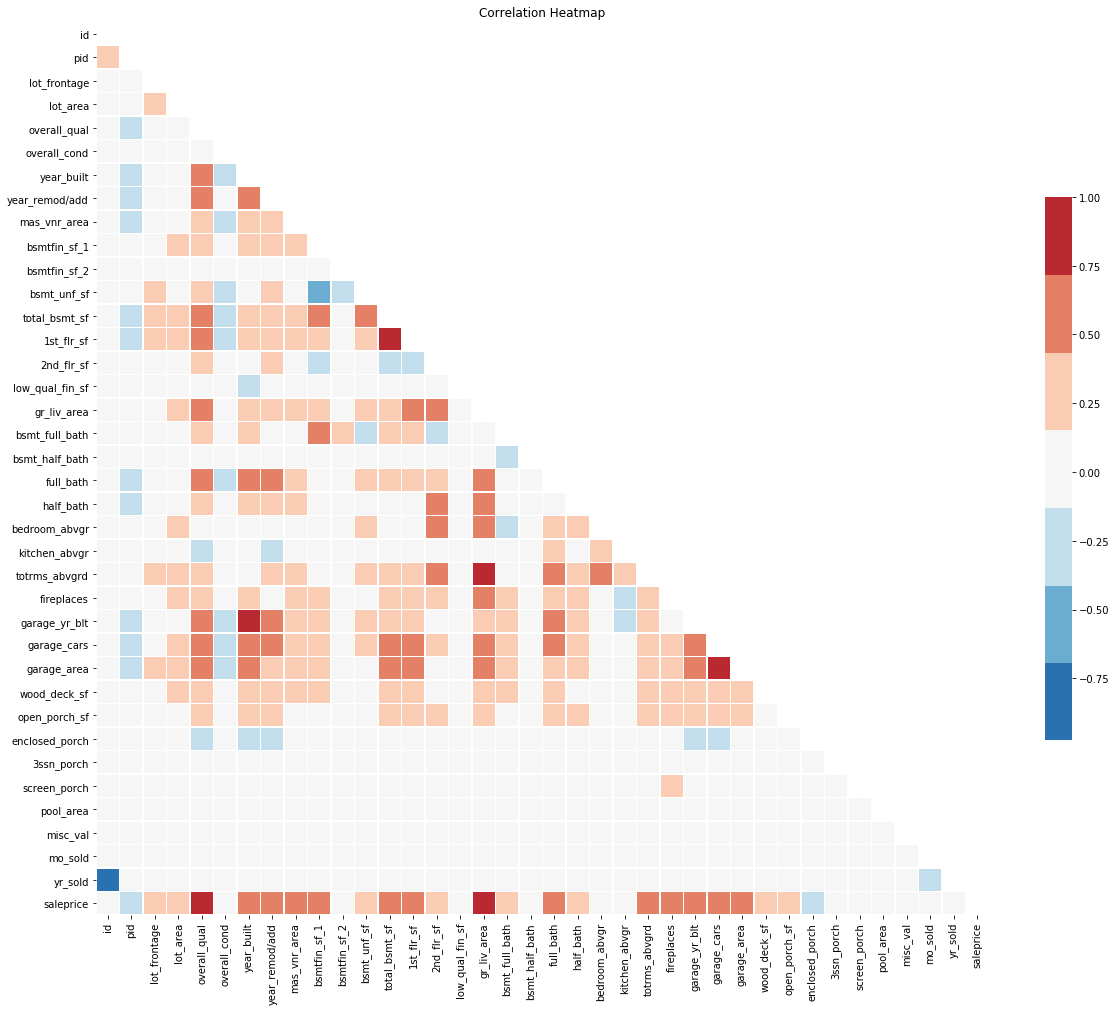

In [46]:
mask = np.zeros_like(ames.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,20))
sns.heatmap(ames.corr(),
            mask = mask,            
            square=True,
            cbar_kws = {'shrink':0.5},
            linewidth = 0.5,
            linecolor = 'white',
            cmap=sns.color_palette("RdBu_r", 7))

plt.title("Correlation Heatmap")

Based on the heatmap, saleprice is highly correlated with overall_qual, gr_liv_area.

There are also some features highly correlated to each other: 
* 1st_flr_sf and total_bsmt_sf
* garage_area and garage_cars
* totalrms_abvgrd and gr_liv_area
* garage_yr_blt and year_built (due to filling of null values in garage_yr_blt)

### Histograms: Numerical Columns Distributions

In [47]:
#function to plot histogram
def subplot_histogram(dataframe, list_of_columns):
    '''This function creates subplots of histograms by passing in a dataframe and list of columns to plot'''
    nrows = int(np.ceil(len(list_of_columns)/4))
    fig, ax = plt.subplots(nrows=nrows, ncols=4, figsize = (20,nrows*6)) 
    ax = ax.ravel()
    for i, column in enumerate(list_of_columns): 
        ax[i].hist(dataframe[column],ec='white')
        ax[i].set_title(column + ' distribution', fontsize = 12)
        ax[i].set_xlabel(column,fontsize = 8)
        ax[i].axvline(dataframe[column].mean(), color='g', linestyle='dashed', linewidth=2, label='Mean')
        ax[i].axvline(dataframe[column].median(), color='r', linestyle='dashed', linewidth=2, label='Median')
        ax[i].legend()
    plt.tight_layout()
    plt.show()

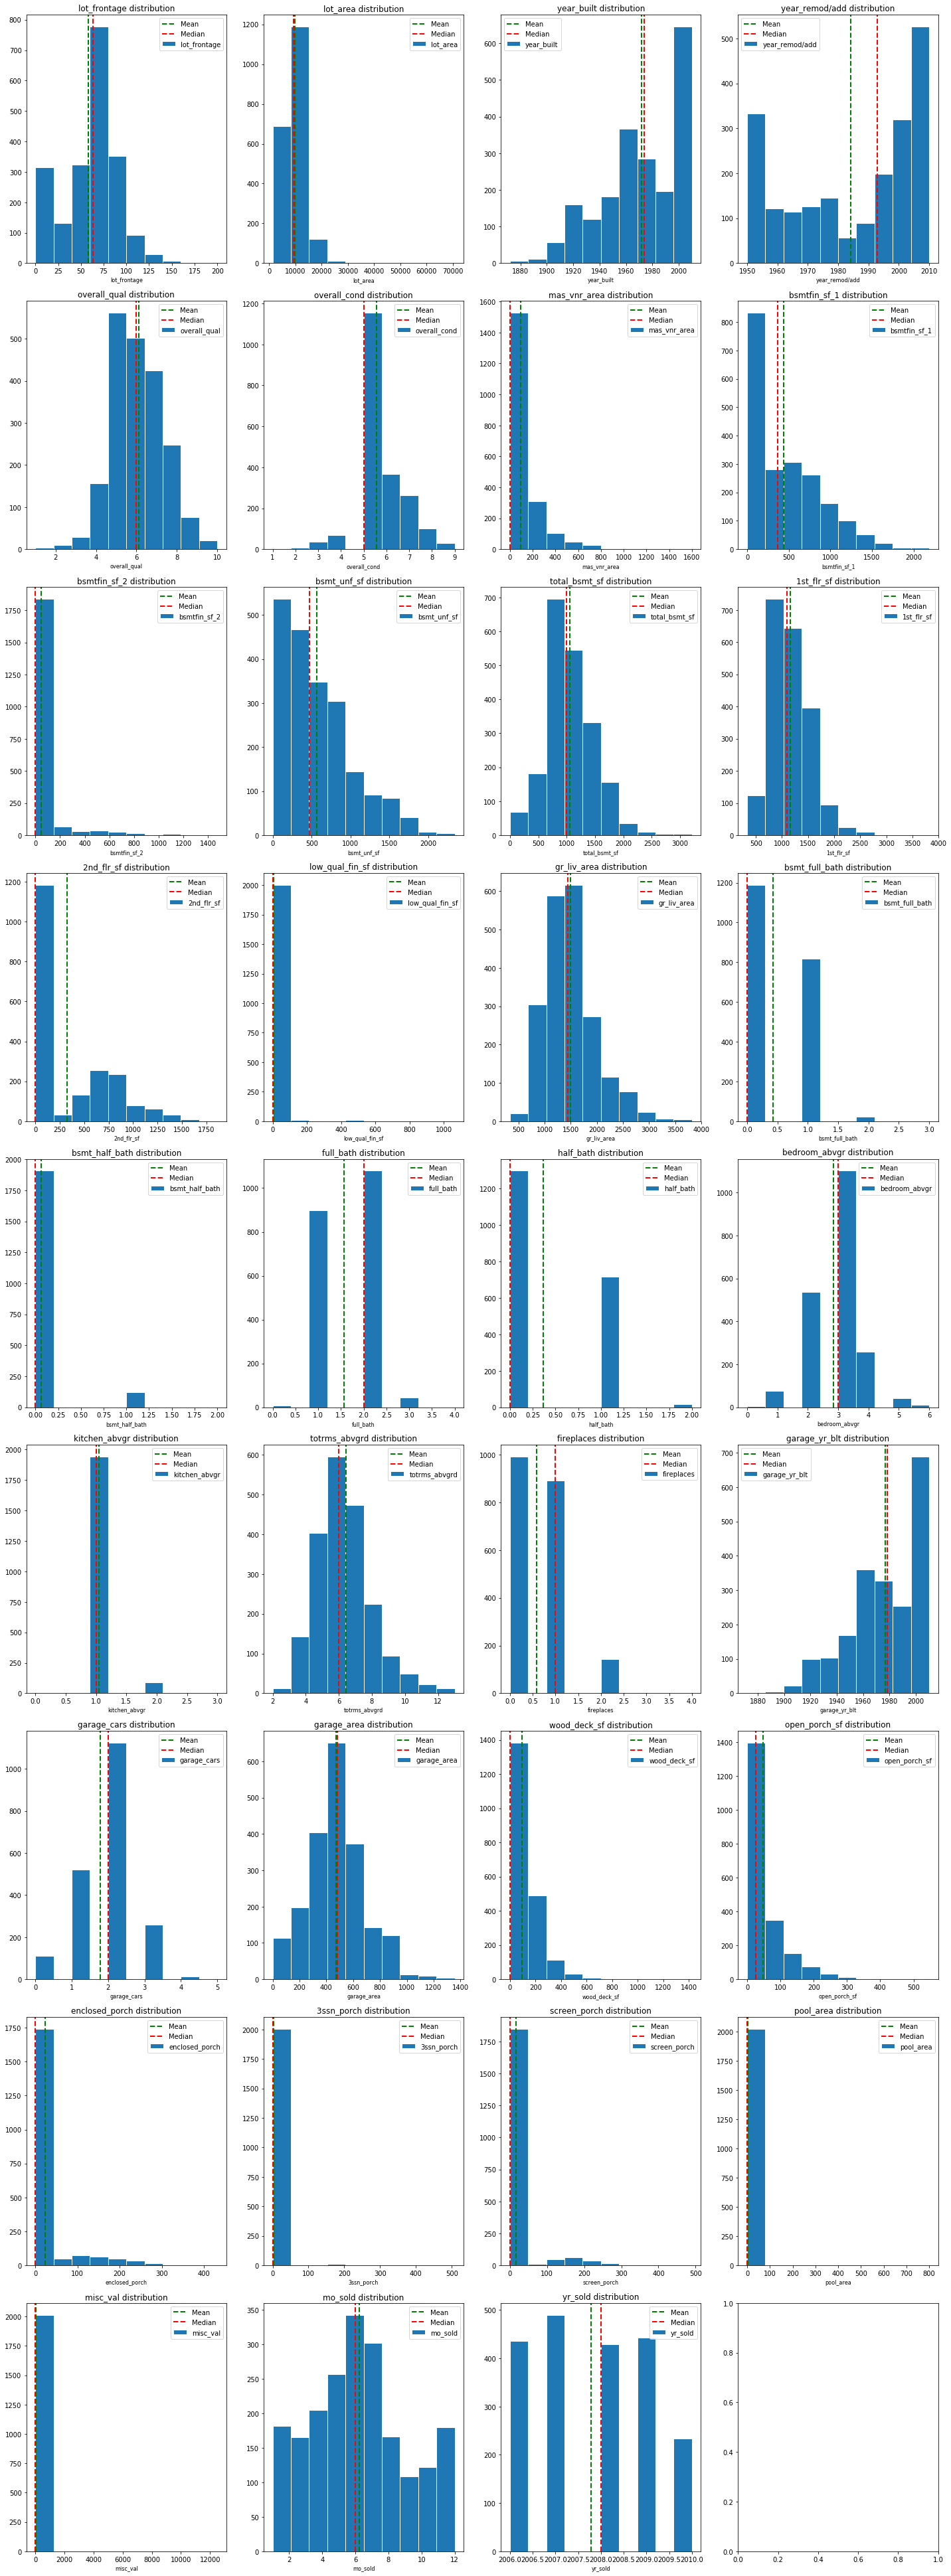

In [48]:
subplot_histogram(ames,numerical_col)

Based on the histogram, these features seem highly skewed towards a value or 0:

* 'bsmtfin_sf_2', 'low_qual_fin_sf', 'bsmt_half_bath', 'kitchen_abvgr', 'enclosed_porch', '3ssn_porch', 'screen_porch', 'pool_area', 'misc_val'

### Scatter Plots: Numerical Columns vs Sale Price

In [49]:
#function to plot scatterplots
def subplot_scatter(dataframe, list_of_columns):
    '''This function creates  subplots of scatterplots by passing in a dataframe and list of columns to plot against sale price.'''
    nrows = int(np.ceil(len(list_of_columns)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(20,nrows*5)) 
    ax = ax.ravel()
    for i, col in enumerate(list_of_columns):
        sns.regplot(x=dataframe[col], y=dataframe['saleprice'], ax = ax[i])
        ax[i].set_title(col + ' vs Sale Price')
        ax[i].set_xlabel(col)
        ax[i].set_ylabel('saleprice')
    plt.tight_layout()


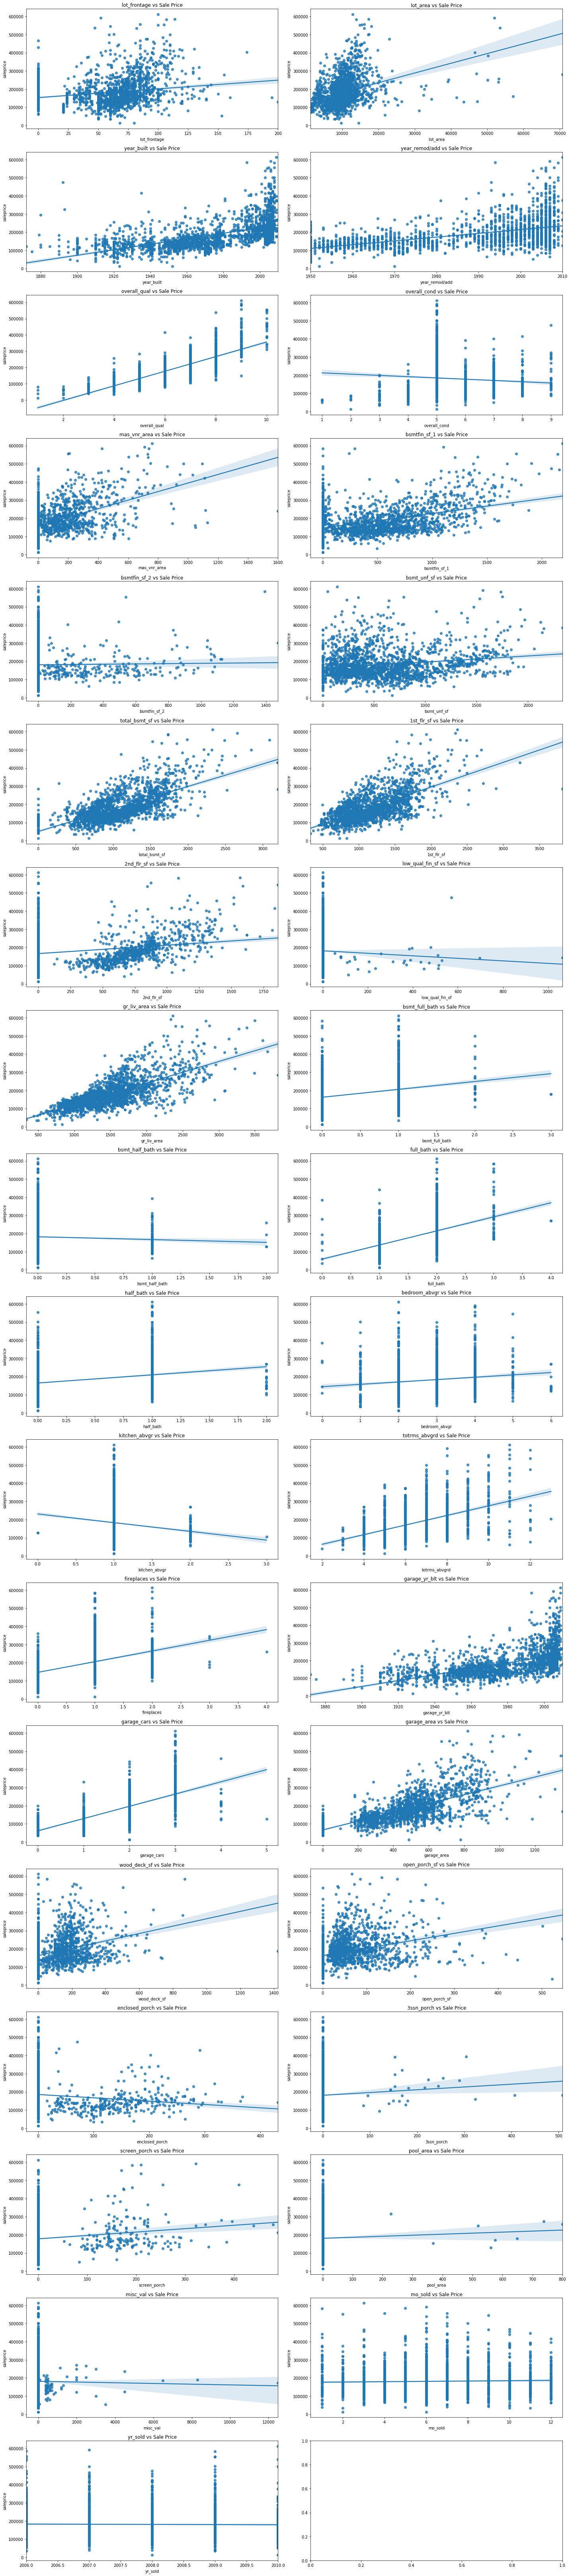

In [50]:
subplot_scatter(ames,numerical_col)

Based on the scatterplot, these features seem to have a positive correlation with sale price: 

* 'lot_frontage', 'lot_area', 'year_built', 'yr_remod/add', 'overall_qual', 'mas_vnr_area', 'bsmtfin_sf_1', 'total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf', 'gr_liv_area', 'bsmt_full_bath', 'full_bath', 'half_bath', 'bedroom_abvgr', 'totrms_abvgrd', 'fireplaces', 'garage_yr_blt', 'garage_cars', 'garage_area', 'wood_dec_sf', 'open_porch_sf','screen_porch'.



### Bar Charts: Categorical Columns Distribution

In [51]:
def subplot_barplot(dataframe,list_of_columns):
    '''This function creates subplots of bar charts by passing in a dataframe and list of columns to plot.'''
    nrows = int(np.ceil(len(list_of_columns)/2))
    fig,ax = plt.subplots(nrows = nrows,ncols=2,figsize=(16,nrows*5))
    ax = ax.flatten()
    for i, col in enumerate(list_of_columns):
        x = dataframe[col].value_counts().index
        y = dataframe[col].value_counts()
        sns.barplot(x = x, y = y, ax = ax[i])
        ax[i].set_title(col + ' distribution')
        ax[i].set_xlabel(col)
        ax[i].set_ylabel('counts')
    plt.tight_layout

In [52]:
ames['ms_subclass'].value_counts().index

Index(['20', '60', '50', '120', '30', '70', '80', '160', '90', '190', '85',
       '75', '180', '45', '40', '150'],
      dtype='object')

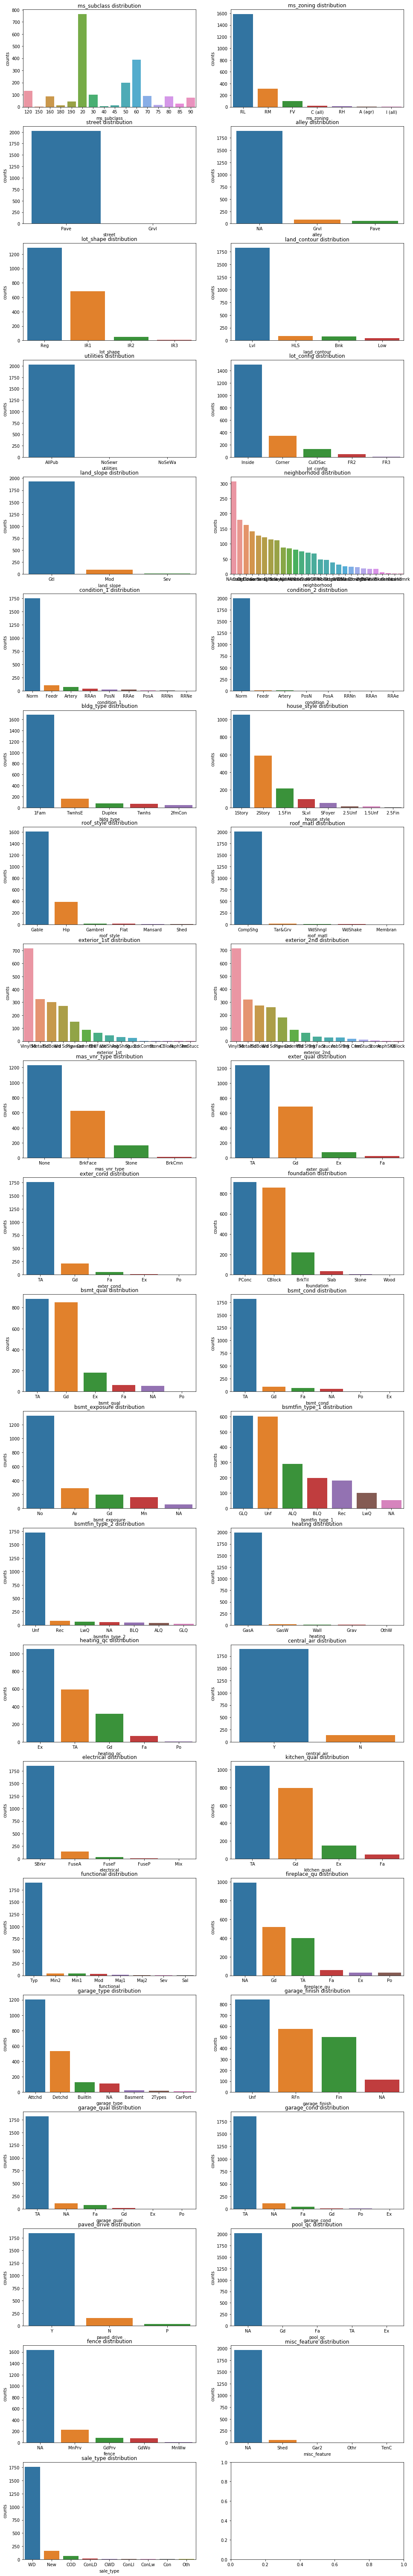

In [53]:
subplot_barplot(ames,categorical_col)

Based on the barplot, these categorical features seem highly skewed towards a value or NA:

* 'street',
'alley',
'land_contour',
'utilities',
'land_slope',
'condition_1',
'condition_2',
'bldg_type',
'roof_matl',
'exter_cond',
'bsmt_cond',
'bsmtfin_type_2',
'heating',
'central_air',
'electrical',
'functional',
'garage_qual',
'garage_cond',
'paved_drive',
'pool_qc',
'fence',
'misc_feature',
'sale_type'

### Box Plots: Categorical Columns vs Sale Price

In [54]:
def subplot_boxplot(dataframe, list_of_columns):
    '''This function creates subplots of boxplots by passing in a dataframe and list of columns to plot against saleprice'''
    nrows = int(np.ceil(len(list_of_columns)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(14,nrows*5))
    ax = ax.ravel()
    for i, col in enumerate(list_of_columns):
        sns.boxplot(x=dataframe[col], y=dataframe['saleprice'], ax = ax[i])
        ax[i].set_title(col + ' vs saleprice')
        ax[i].set_xlabel(col)
        ax[i].set_ylabel('saleprice')
    plt.tight_layout


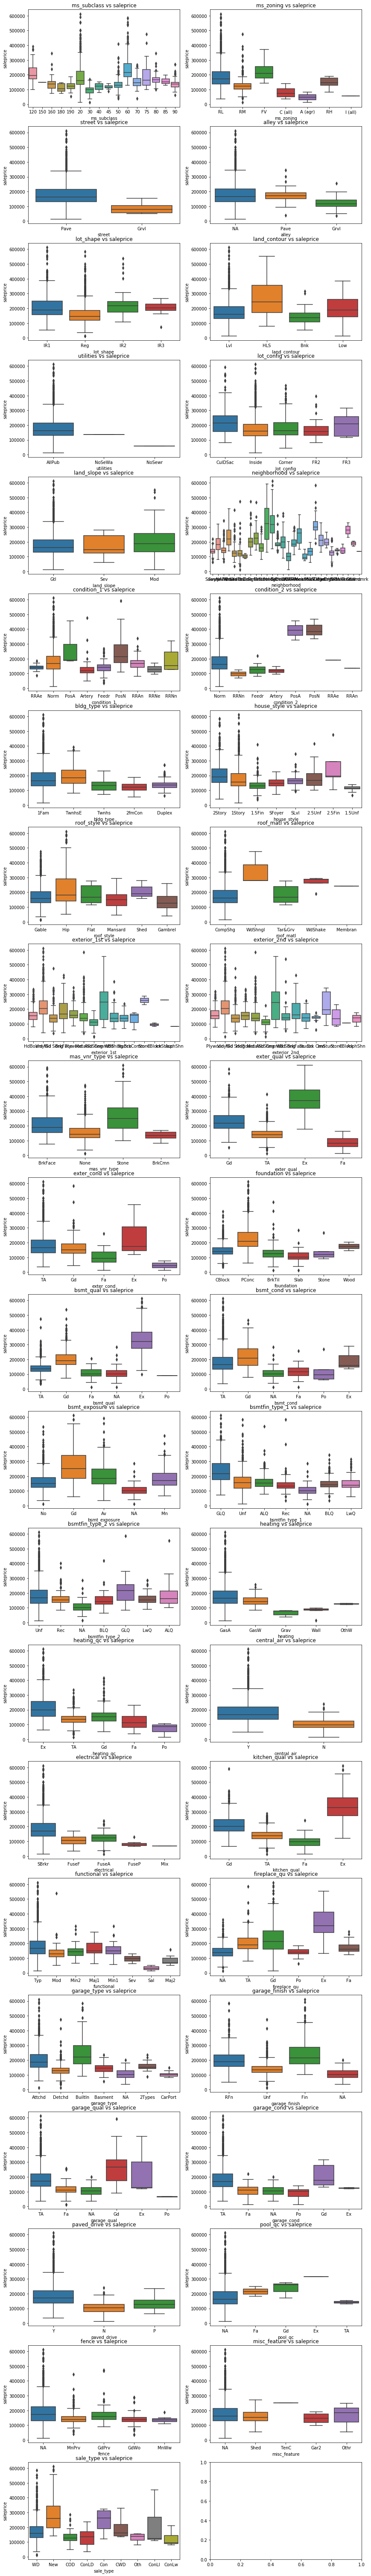

In [55]:
subplot_boxplot(ames,categorical_col)

Based on boxplot, these features seem to have a correlation with sale price:

* 'street_paved', 'neighborhood', 'condition_1', 'condition_2 - PosA PosN', 'roof_matl', 'exter_qual', 'bsmt_qual', 'central_air', 'kitchen_qual', 'fireplace_qu', 'garage_type', 'garage_qual'

## Pre-processing

### Encode / Map: Categorical data

In [56]:
#encode street
ames['street'] = ames['street'].map({'Pave':1,'Grvl':0})
ames_test['street'] = ames_test['street'].map({'Pave':1,'Grvl':0})

#rename street column
ames.rename(columns={'street':'street_paved'},inplace=True)
ames_test.rename(columns={'street':'street_paved'},inplace=True)

In [57]:
#encode central_air
ames['central_air'] = ames['central_air'].map({'Y':1,'N':0})
ames_test['central_air'] = ames_test['central_air'].map({'Y':1,'N':0})

In [58]:
#alley - change to available/not available
ames['alley'] = ames['alley'].map({'Grvl':1,'Pave':1,'NA':0})
ames_test['alley'] = ames_test['alley'].map({'Grvl':1,'Pave':1,'NA':0})

In [59]:
#porch - change to available / not available
ames['porch'] = ames[['open_porch_sf','enclosed_porch', '3ssn_porch', 'screen_porch']].sum(axis=1)
ames['porch'] = ames['porch'].apply(lambda x : 1 if x != 0 else 0)
ames_test['porch'] = ames_test[['open_porch_sf','enclosed_porch', '3ssn_porch', 'screen_porch']].sum(axis=1)
ames_test['porch'] = ames_test['porch'].apply(lambda x : 1 if x != 0 else 0)

ames.drop(columns=['open_porch_sf','enclosed_porch', '3ssn_porch', 'screen_porch'],inplace=True)
ames_test.drop(columns=['open_porch_sf','enclosed_porch', '3ssn_porch', 'screen_porch'],inplace=True)

In [60]:
#pool - change to presence
ames['pool'] = ames['pool_area'].apply(lambda x: 1 if x != 0 else 0)
ames_test['pool'] = ames_test['pool_area'].apply(lambda x: 1 if x != 0 else 0)

ames.drop(columns='pool_area',inplace=True)
ames_test.drop(columns='pool_area',inplace=True)

In [61]:
#fence - change to presence
ames['fence'] = ames['fence'].map({'GdPrv':1,'GdWo':1,'MnPrv':0,'MnWw':0,'NA':0})
ames_test['fence'] = ames_test['fence'].map({'GdPrv':1,'GdWo':1,'MnPrv':0,'MnWw':0,'NA':0})

In [62]:
#ensure consistency in exterior_1st & exterior_2nd value spelling

ames = ames.replace({'exterior_2nd':{'CmentBd':'CemntBd','Wd Shng': 'WdShing','Brk Cmn':'BrkComm'}})
ames_test = ames_test.replace({'exterior_2nd':{'CmentBd':'CemntBd','Wd Shng':'WdShing','Brk Cmn':'BrkComm'}})

In [63]:
#mas_vnr_type value spelling

ames = ames.replace({'mas_vnr_type':{'BrkCmn':'BrkComm'}})
ames_test = ames_test.replace({'mas_vnr_type':{'BrkCmn':'BrkComm'}})

In [64]:
#roof_style value spelling
ames = ames.replace({'roof_style':{'WdShngl':'WdShing'}})
ames_test = ames_test.replace({'roof_style':{'WdShngl':'WdShing'}})

In [65]:
#add new column: age_sold
ames['age_sold'] = ames['yr_sold'] - ames['year_built']
ames_test['age_sold'] = ames_test['yr_sold'] - ames_test['year_built']

In [66]:
ames.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street_paved', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
   

### Encode / Map: Ordinal Columns

In [67]:
# encoding and mapping ordinal columns
ordinal_col = ['lot_shape', 'land_contour', 'utilities', 'land_slope', 'exter_qual', 
               'exter_cond', 'bsmt_qual','bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1',
               'bsmtfin_type_2', 'heating_qc','kitchen_qual','functional', 'fireplace_qu', 
               'garage_finish', 'garage_qual', 'garage_cond', 'paved_drive']


ordinal_dict = {'lot_shape':{'Reg':3,'IR1':2,'IR2':1,'IR3':0}, 
 'land_contour':{'Lvl':3,'Bnk':2,'HLS':1,'Low':0},
 'utilities':{'AllPub':3,'NoSewr':2,'NoSeWa':1,'ELO':0},
 'land_slope':{'Gtl':2,'Mod':1,'Sev':0},
 'exter_qual':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0},
 'exter_cond':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0},
 'bsmt_qual':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0},
 'bsmt_cond':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0},
 'bsmt_exposure':{'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0},
 'bsmtfin_type_1':{'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0},
 'bsmtfin_type_2':{'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0},
 'heating_qc':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0},
 'kitchen_qual':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0},
 'functional':{'Typ':7,'Min1':6,'Min2':5,'Mod':4,'Maj1':3,'Maj2':2,'Sev':1,'Sal':0},
 'fireplace_qu':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0},
 'garage_finish':{'Fin':3,'RFn':2,'Unf':1,'NA':0},
 'garage_qual':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0},
 'garage_cond':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0},
 'paved_drive':{'Y':2,'P':1,'N':0},
'pool_qc':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0}
}

#iterate and map
for col,value in ordinal_dict.items():
    ames[col] = ames[col].map(value)
    ames_test[col] = ames_test[col].map(value)

### Dummies: Categorical columns

In [68]:
dummies_col = ['ms_subclass','ms_zoning','lot_config','neighborhood',
               'condition_1','condition_2','bldg_type','house_style',
               'roof_style','roof_matl','exterior_1st', 'exterior_2nd', 
               'mas_vnr_type','foundation','heating','electrical',
               'garage_type','misc_feature','sale_type']

In [69]:
ames.shape

(2031, 79)

In [70]:
ames_test.shape

(879, 78)

In [71]:
# concat ames and ames_test then get_dummies to fix missing values that may be present in ames but not in the other / vice versa
len_ames = len(ames)
ames_ames_test_combined = pd.concat([ames, ames_test])
ames_ames_test_combined_dummies = pd.get_dummies(ames_ames_test_combined, drop_first=True)

# Separate them back into ames and ames_test
ames_dummies = ames_ames_test_combined_dummies.iloc[:len_ames, :]
ames_test_dummies = ames_ames_test_combined_dummies.iloc[len_ames:, :]

In [72]:
ames_dummies.shape

(2031, 217)

In [73]:
ames_test_dummies.shape

(879, 217)

In [74]:
#drop saleprice column from kaggle test
ames_test_dummies.drop(columns='saleprice',inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Export DataFrame with added dummies to .csv

In [75]:
#export to csv

ames_dummies.to_csv('./datasets/ames_dummies.csv',index=False)
ames_test_dummies.to_csv('./datasets/ames_test_dummies.csv',index=False)

### Correlation Heatmap with Sale Price

Text(0.5, 1.0, 'Correlation Heatmap with Sale Price')

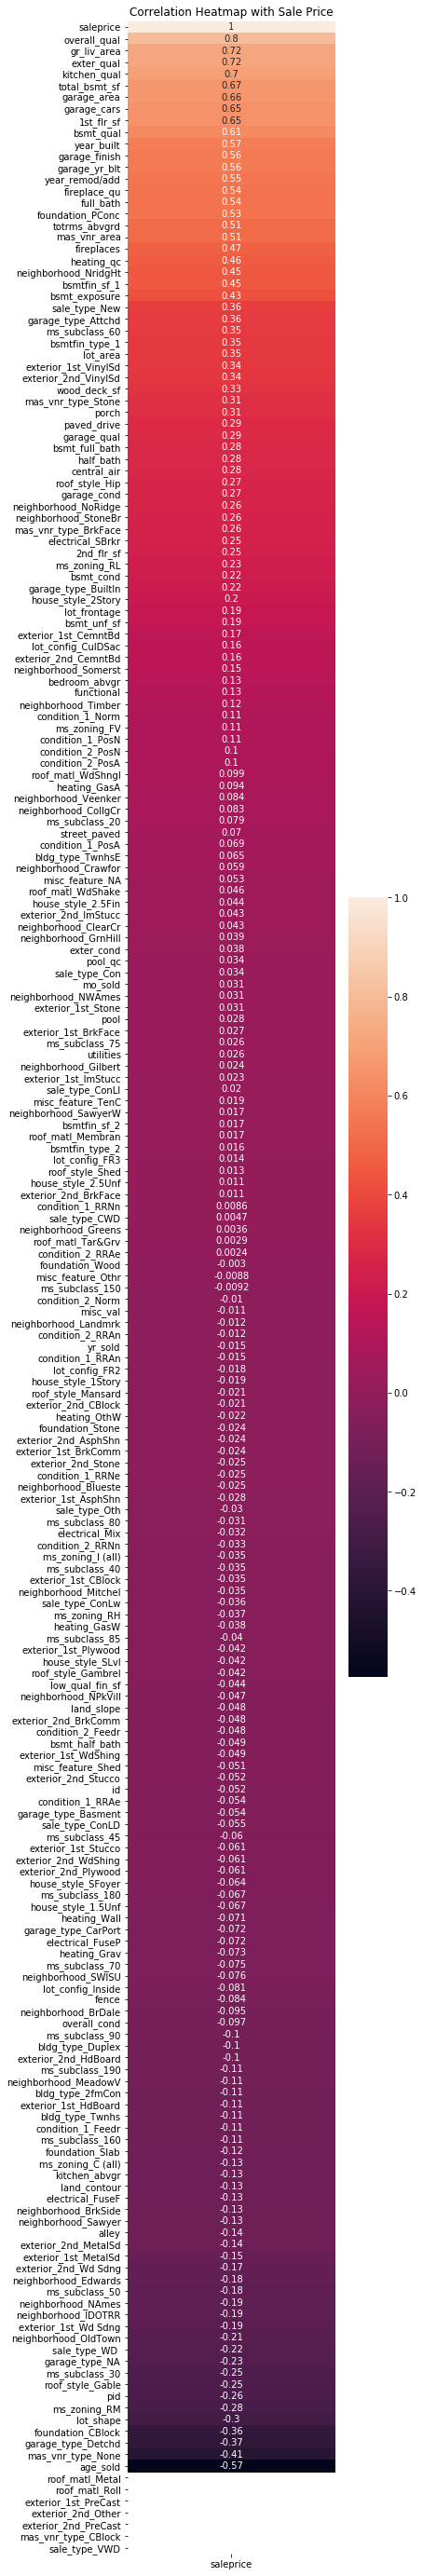

In [76]:
plt.figure(figsize=(5,50))
sns.heatmap(ames_dummies.corr()[['saleprice']].sort_values('saleprice',ascending=False),annot=True)
plt.title('Correlation Heatmap with Sale Price')

Based on the heatmap, these features have a high positive correlation (more than 0.6) with saleprice:

* 'overall_qual','gr_liv_area', 'exter_qual', 'kitchen_qual', 'total_bsmt_sf', 'garage_area', 'garage_cars', '1st_flr_sf', 'bsmt_qual'

These features have a high negative correlation (less than -0.5) with saleprice:
* 'age_sold'

In [77]:
ames_dummies.corr()[['saleprice']].sort_values('saleprice',ascending=False)

,saleprice
saleprice,1.000000
overall_qual,0.803866
gr_liv_area,0.720565
exter_qual,0.718138
kitchen_qual,0.695381
total_bsmt_sf,0.665307
garage_area,0.656382
garage_cars,0.649290
1st_flr_sf,0.648431
bsmt_qual,0.613731


### Features matrix (`X`) and target vector (`y`)

In [78]:
#prepare X and y
X = ames_dummies.loc[:,ames_dummies.columns != 'saleprice']
y = ames_dummies['saleprice']


### Train/Test Split

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

In [80]:
X_train.shape

(1523, 216)

In [81]:
X_test.shape

(508, 216)

### Scaling

In [82]:
#instantiate
ss = StandardScaler()

#fit
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

#X_ames_test_scaled = ss.fit_transform(X_ames_test)


## 4. Modeling

### Candidate Models and Hyperparameters

#### Baseline Model

In [83]:
yhat = [np.mean(y) for i in range(len(y))]
baseline_r2 = r2_score(y, yhat)
baseline_rmse = np.sqrt(mean_squared_error(y, yhat))
print('Baseline R2 score:', baseline_r2)
print('Baseline RMSE score:', baseline_rmse)

Baseline R2 score: 0.0
Baseline RMSE score: 79364.77439647526


#### Linear Regression

In [84]:
#instantiate models
lr = LinearRegression()

#fit
lr.fit(X_train_scaled,y_train)

#R2 score
lr_r2_scores = cross_val_score(lr,X_train_scaled,y_train,cv=5,scoring='r2')

#RMSE
lr_rmse_scores = np.sqrt(-cross_val_score(lr,X_train_scaled,y_train,cv=5,scoring='neg_mean_squared_error'))


print('Linear Regression R2 score: ' + str(lr_r2_scores.mean()))
print('Linear Regression RMSE score: ' + str(lr_rmse_scores.mean()))

Linear Regression R2 score: -6.810311072447514e+24
Linear Regression RMSE score: 1.4272737875843056e+17


#### Ridge

In [85]:
#instantiate
ridge = RidgeCV(alphas = np.logspace(0,5,200))

#fit
ridge.fit(X_train_scaled,y_train)

#cross_val_score R2
ridge_r2_scores = cross_val_score(ridge,X_train_scaled,y_train,cv=5,scoring='r2')

#RMSE
ridge_rmse_scores = np.sqrt(-cross_val_score(ridge,X_train_scaled,y_train,cv=5,scoring='neg_mean_squared_error'))

print('Ridge R2 score: ' + str(ridge_r2_scores.mean()))
print('Ridge RMSE score: ' + str(ridge_rmse_scores.mean()))
print('Ridge optimal alpha: ', ridge.alpha_)

Ridge R2 score: 0.9071203022740081
Ridge RMSE score: 24151.886064030634
Ridge optimal alpha:  144.81182276745346


#### Lasso

In [86]:
import warnings
warnings.simplefilter("ignore")

#instantiate 
lasso = LassoCV(alphas = np.logspace(-4, 0, 50), n_alphas = 200, random_state=100)

#fit
lasso.fit(X_train_scaled,y_train)

#cross_val_score R2
lasso_r2_scores = cross_val_score(lasso,X_train_scaled,y_train,cv=5,scoring='r2') 

#RMSE score
lasso_rmse_scores = np.sqrt(-cross_val_score(lasso,X_train_scaled,y_train,cv=5,scoring='neg_mean_squared_error'))


print('Lasso R2 score: ' + str(lasso_r2_scores.mean()))
print('Lasso RMSE score: ' + str(lasso_rmse_scores.mean()))
print('Lasso optimal alpha: ', lasso.alpha_)

Lasso R2 score: 0.8966435324784279
Lasso RMSE score: 25436.165794983976
Lasso optimal alpha:  1.0


#### ElasticNet

In [87]:
#instantiate
enet_alphas = np.logspace(0,5,200)
enet_lratio = [.01, .05, .1, .5, .7, .9, .95, .99, 1]
enet = ElasticNetCV(alphas=enet_alphas,l1_ratio = enet_lratio, random_state=100)

#fit
enet.fit(X_train_scaled,y_train)

#cross_val_score R2
enet_r2_scores = cross_val_score(enet,X_train_scaled,y_train,cv=5,scoring='r2')

#RMSE score
enet_rmse_scores = np.sqrt(-cross_val_score(enet,X_train_scaled,y_train,cv=5,scoring='neg_mean_squared_error'))

print('enet R2 score: ' + str(enet_r2_scores.mean()))
print('enet RMSE score: ' + str(enet_rmse_scores.mean()))
print('enet optimal alpha: ', enet.alpha_)
print('enet optimal l1: ', enet.l1_ratio_)

enet R2 score: 0.909018609614637
enet RMSE score: 23932.794590557496
enet optimal alpha:  460.5922041145108
enet optimal l1:  1.0


### Evaluate Model Performance on Test Data

#### Linear Regression

In [88]:
y_pred = lr.predict(X_test_scaled)

print('Linear Regression Test R2: ', lr.score(X_test_scaled,y_test))
print('Linear Regression Test RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

Linear Regression Test R2:  -9.558341344352505e+21
Linear Regression Test RMSE:  7623752326655215.0


#### Ridge

In [89]:
y_pred = ridge.predict(X_test_scaled)

print('Ridge Test R2: ', ridge.score(X_test_scaled,y_test))
print('Ridge Test RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

Ridge Test R2:  0.89394716591334
Ridge Test RMSE:  25394.44059709621


#### Lasso

In [90]:
y_pred = lasso.predict(X_test_scaled)

print('Lasso Test R2: ', lasso.score(X_test_scaled,y_test))
print('Lasso Test RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

Lasso Test R2:  0.8858180638592891
Lasso Test RMSE:  26349.73260808377


#### ElasticNet

In [91]:
y_pred = enet.predict(X_test_scaled)

print('ElasticNet Test R2: ', enet.score(X_test_scaled,y_test))
print('ElasticNet Test RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

ElasticNet Test R2:  0.8955741195696978
ElasticNet Test RMSE:  25198.900040174638


All models have a higher R2 score indicating a significantly better performancecompared to the baseline model. RMSEs are also much smaller compared to baseline RMSE.

In the training model, ElasticNet performed only minimally better than other models.

When applied onto the testing set, ElasticNet still performed minimally better than other models. It is however slightly overfitted in the training set since the R2 score is higher and RMSE is lower than the testing set.

For this reason, we will choose ElasticNet, which has the best R2 and RMSE on training and testing set as the final model for features selection. It is worth noting that our ElasticNet uses a l1 ratio of 1.0, meaning it is using 100% Lasso. However, our Lasso Model did not perform as well. This is likely due to the hyperparameters of alphas we passed into the two models.

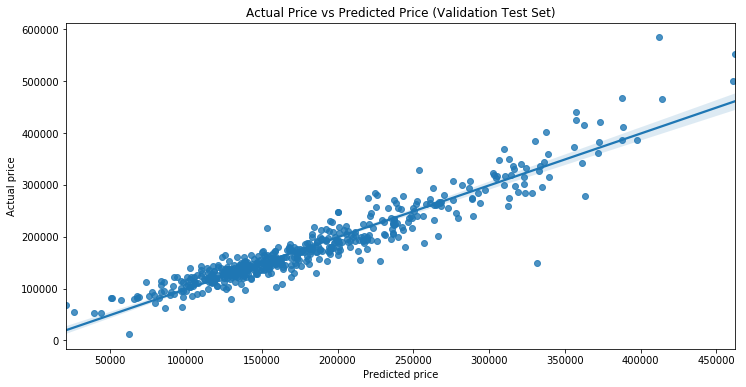

In [92]:
# Ploting the ElasticNet model predictions and actual
pred_test = enet.predict(X_test_scaled)
plt.figure(figsize=(12,6))
sns.regplot(x=pred_test, y=y_test)
plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title('Actual Price vs Predicted Price (Validation Test Set)');


Here we can see a linear relationship between the actual price vs predicted price for our validation test set. Our ElasticNet model appears to be a model that can be generalized. However, at the higher prices, our model may not be as strong since the points are further from the line. 

## 5. Features Selection

Text(0.5, 0, 'Coefficients')

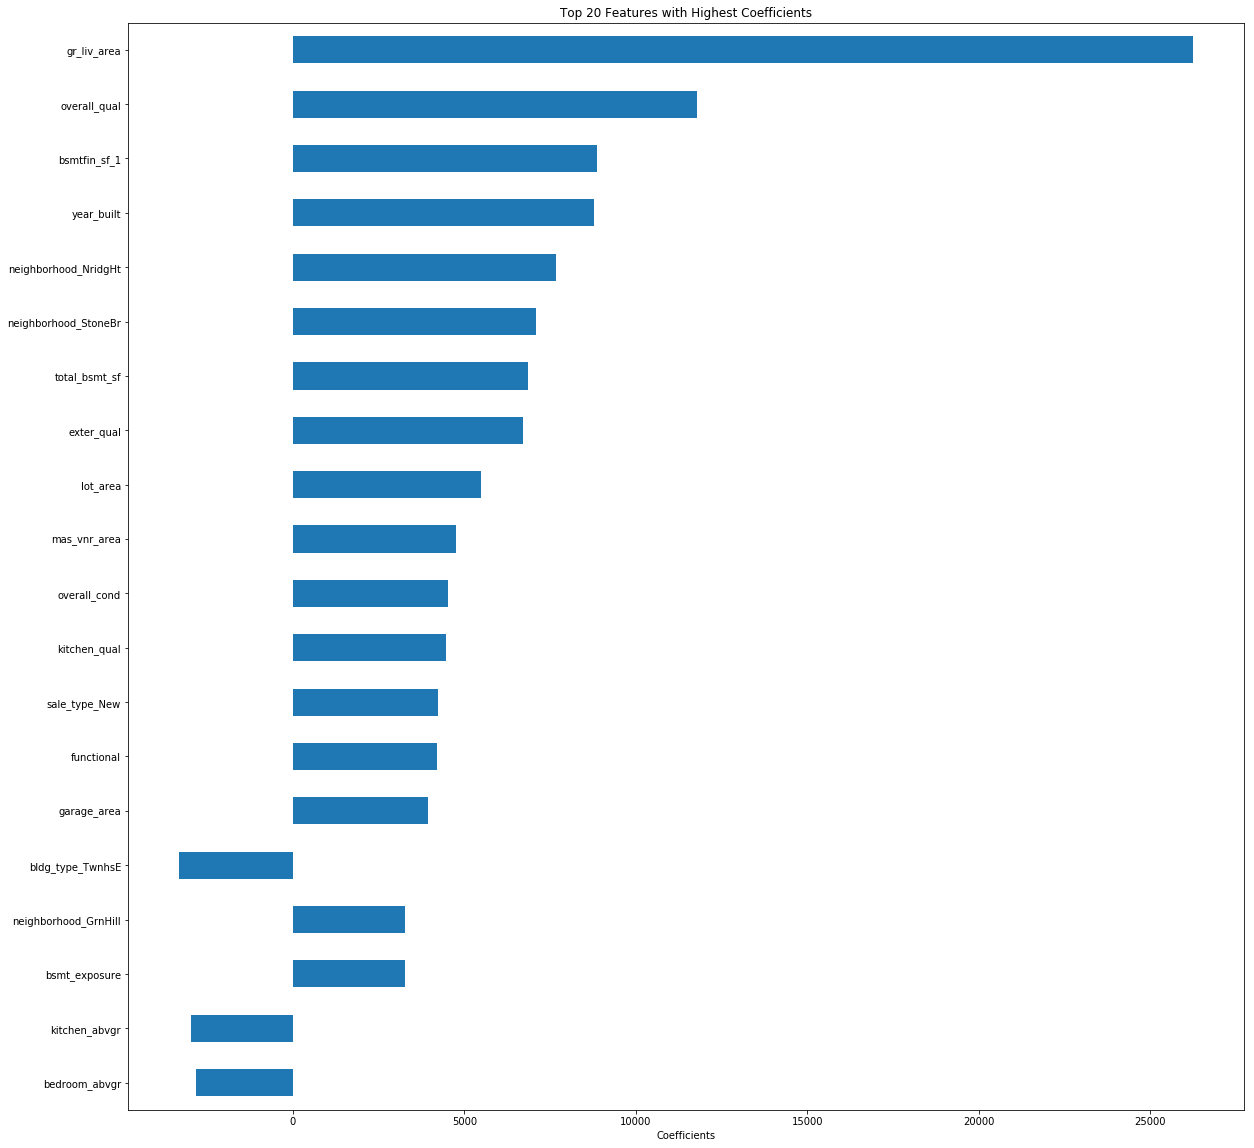

In [93]:
enet_col_coef = pd.DataFrame(data={'enet_coef': enet.coef_},index=X.columns)
enet_col_coef = enet_col_coef[enet_col_coef['enet_coef'] != 0]
enet_col_coef['abs_enet_coef'] = np.abs(enet_col_coef['enet_coef'])
enet_col_coef.sort_values(by= 'abs_enet_coef', ascending=True,inplace=True)
top_20_features = enet_col_coef['enet_coef'].tail(20)
top_20_features.plot.barh(figsize=(20,20))

plt.title("Top 20 Features with Highest Coefficients")
plt.xlabel("Coefficients")


In [94]:
top_20_features

bedroom_abvgr           -2827.606336
kitchen_abvgr           -2963.486414
bsmt_exposure            3257.037768
neighborhood_GrnHill     3278.407323
bldg_type_TwnhsE        -3329.238339
garage_area              3953.816060
functional               4216.007919
sale_type_New            4220.171161
kitchen_qual             4470.409991
overall_cond             4518.442583
mas_vnr_area             4765.683046
lot_area                 5498.010478
exter_qual               6721.809311
total_bsmt_sf            6853.919046
neighborhood_StoneBr     7099.772439
neighborhood_NridgHt     7683.141463
year_built               8783.216480
bsmtfin_sf_1             8876.167383
overall_qual            11800.582283
gr_liv_area             26264.078628
Name: enet_coef, dtype: float64

### Selected Features

In [95]:
enet_col_coef['enet_coef'].tail(20).index


Index(['bedroom_abvgr', 'kitchen_abvgr', 'bsmt_exposure',
       'neighborhood_GrnHill', 'bldg_type_TwnhsE', 'garage_area', 'functional',
       'sale_type_New', 'kitchen_qual', 'overall_cond', 'mas_vnr_area',
       'lot_area', 'exter_qual', 'total_bsmt_sf', 'neighborhood_StoneBr',
       'neighborhood_NridgHt', 'year_built', 'bsmtfin_sf_1', 'overall_qual',
       'gr_liv_area'],
      dtype='object')

In [96]:
features = [col for col in enet_col_coef['enet_coef'].tail(20).index]
features

['bedroom_abvgr',
 'kitchen_abvgr',
 'bsmt_exposure',
 'neighborhood_GrnHill',
 'bldg_type_TwnhsE',
 'garage_area',
 'functional',
 'sale_type_New',
 'kitchen_qual',
 'overall_cond',
 'mas_vnr_area',
 'lot_area',
 'exter_qual',
 'total_bsmt_sf',
 'neighborhood_StoneBr',
 'neighborhood_NridgHt',
 'year_built',
 'bsmtfin_sf_1',
 'overall_qual',
 'gr_liv_area']

### Final Model with Selected Features

In [97]:
#fit x
X_train_sel = X_train[features]
X_test_sel = X_test[features]

#instantiate scale
ss = StandardScaler()

#fit
X_train_sel_scaled = ss.fit_transform(X_train_sel)
X_test_sel_scaled = ss.transform(X_test_sel)

#fit train data with selected features
enet.fit(X_train_sel_scaled,y_train)

#cross_val_score R2
enet_r2_scores = cross_val_score(enet,X_train_sel_scaled,y_train,cv=5,scoring='r2') 

#RMSE score
enet_rmse_scores = np.sqrt(-cross_val_score(enet,X_train_sel_scaled,y_train,cv=5,scoring='neg_mean_squared_error'))

#predict test data with selected features
y_pred = enet.predict(X_test_sel_scaled)

print('ElasticNet Test R2 (Selected 20 Features): ', enet.score(X_test_sel_scaled,y_test))
print('ElasticNet Test RMSE (Selected 20 Features): ', np.sqrt(mean_squared_error(y_test, y_pred)))

ElasticNet Test R2 (Selected 20 Features):  0.8797057526615134
ElasticNet Test RMSE (Selected 20 Features):  27045.806751593052


ElasticNet model performed almost similar with the shortlisted features compared to full features. 


* ElasticNet Test R2 (All Features):  0.8955741195696978
* ElasticNet Test RMSE (All Features):  25198.900040174638

* ElasticNet Test R2 (Selected 20 Features):  0.8797057526615134
* ElasticNet Test RMSE (Selected 20 Features):  27045.806751593052

## 6. Kaggle Submission

Using the ElasticNet Model, the Kaggle Score (which calculates RMSE) is \\$30039.56086 (private) and 
\\$27761.98447 (public).

### Scaling Kaggle Test Data

In [98]:
#features
kaggle_features = enet_col_coef['enet_coef'].tail(30).index

#get dataframe with selected features
X_train_sel = ames_dummies[kaggle_features] 
X_kaggle = ames_test_dummies[kaggle_features]

#instantiate
ss = StandardScaler()

#fit
X_train_sel_scaled = ss.fit_transform(X_train_sel)
X_kaggle_scaled = ss.transform(X_kaggle)

### Fitting Model and Getting Kaggle Predictions

In [100]:
#fit train data with selected features
enet.fit(X_train_sel_scaled,y)

#generate predictions
pred = enet.predict(X_kaggle_scaled)

### Export data for Submission

In [101]:
submissions = pd.DataFrame()
submissions['Id'] = ames_test['id']
submissions['SalePrice'] = pred
submissions.to_csv('submission.csv',index=False)

## 7. Conclusion and Recommendations

Our ElasticNet Model, scaled with StandardScaler performed best on predicting the sale prices of houses in Ames, IA.

### Features that add the most value to a home
* GrLivArea: Above grade (ground) living area square feet
* OverallQual: Overall material and finish quality
* BsmtFinSF1: Basement Type 1 finished square feet
* YearBuilt
* Neighborhood: Northridge Heights
* Neighborhood: Stone Brook
* TotalBsmtSF: Total square feet of basement area
* ExterQual: Exterior material quality
* LotArea: Lot size in square feet
* MasVnrArea: Masonry veneer area in square feet
* Overall Condition
* Kitchen Quality
* Sale Type: New
* Typical Functionality
* GarageArea: Size of garage in square feet
* LotBsmtExposure: Walkout or garden level basement walls

### Features that hurt the value of a home the most
* Buuilding Type: Townhouse End Unit

### Things that home owners could improve in their homes to increase the value
* Overall quality and external quality: With a unit increase in overall quality (up to excellent), it increases the house value by \\$ 11800. 
A unit increase in external quality (up to excellent) increase the house value by \\$ 6721. For example, we can repaint the house, replace wallpapers, replace carpet materials and other exterior improvements.
* Kitchen quality: With a unit increase in kitchen quality (up to excellent), the price increases by \\$ 4470. We can consider replacing old or retired appliances should the cost not be more than the unit increase.
* Overall Condition of house: With a unit increase in overall condition (up to excellent), it increases the house value by \\$4518. It is important to keep cleanliness and tidiness of the house, and consider whether to replace retired interior or exterior.
* Functionality: With a unit increase in functionality / maintaining functionality typical, it increases the house value by \\$4216. Keeping functionality of the house at basic level with no deductions is important. We can also installing some affordable smart homes devices.

### Things that house buyers should look out for when purchasing homes
* Renovation prices involving overall quality and external quality: renovation cost of improving overall quality and external quality needs to be considered. Existing good overall quality contribute to house prices greatly, followed by existing good external quality. For example, if the cost to renovate it up to that quality is less, it may be worth renovating a house with lower quality. 
* Year Built of house: Houses built earlier / that are older cost less.
* Renovation prices involving kitchen quality: if there is an intent to improve the kitchen quality, we should consider the cost needed compared to getting another house of a higher kitchen quality.



### Neighborhoods of good investment
The neighborhood a house is situated at plays an important part on sale price. Neighborhoods that have a higher positive effect on pricing include Northridge Heights, Stone Brook, NorthRidge. Among all neighborhoods, Greenhill is the most expensive. In this case, investing in Northridge Heights, Stone Brook, and NorthRidge are a better option.


### Recommendations & Further Research
* Certain features in the dataset (square feet, quality) in Ames could be generalized to other cities in USA of similar GDP or markets. Features such as neighborhood specific to Ames would need to be removed to make the model more universal for other cities. Factors like fireplaces, heating would also be affected depending on the temperatures in the other USA cities. Supply and demand indices of housing in each city would be needed as well.
* The dataset captures only houses sold during 2006 - 2010 in Ames. We may not be able to generalize the result for use in present day due to external factors such as inflation, economical outlook of the year, availability of mortgages, supply and demand of housing and more.
* The dataset primarily captures house features and minamlly on nearby amenities (park, railroad). Other factors would include ease of access to supermarkets / hospital / schools / eateries, and distance from city centre. Factors like crime rates, fire-prone, flood potential, unforseen developments, traffic conditions are also important.
* The dataset does not have a lot of samples with sale prices > $400,000. To predict the prices of higher-valued homes, more datasets are needed.